<h1> Capstone Project: Milestone III

<h4> By Jennifer Widjaja and Emily Tan

<h3> Topic: Investigating the Influence of Age on Consumer Purchasing Behavior

In [1]:
!pip install datascience
!pip install iwut
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))

#import d8error

In [2]:
shopping_trends = Table.read_table("shopping_trends_updated.csv") 
ages_18_to_24 = shopping_trends.where("Age", are.between_or_equal_to(18, 24))
ages_25_to_34 = shopping_trends.where("Age", are.between_or_equal_to(25, 34))
ages_35_to_49 = shopping_trends.where("Age", are.between_or_equal_to(35, 49))
ages_50_to_70 = shopping_trends.where("Age", are.between_or_equal_to(50, 70))

<h3> Brief recap of our findings from Milestone II

<p> Before completing milestone II, we anticipated that there would be a strong correlation between average total purchases and age groups. Specifically, we expected that as age increased, so would the amount spent on purchases. However, upon conducting our data collection for Milestone II and analyzing purchase amounts across different age groups, we discovered that there wasn't a significant correlation indicating that higher age groups spend more. 

Below is an example of how season influence average total purhcase amount across different age groups. As you can see, the total purchase amount across all age groups are about the same which indicates that there is not a direct correlation between the two variables. 


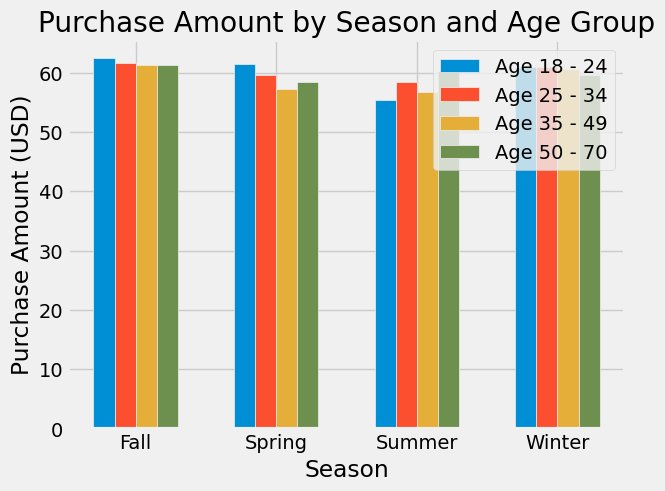

In [44]:
season_18_to_24 = ages_18_to_24.select("Season", "Purchase Amount (USD)").group("Season", np.mean)
season_25_to_34 = ages_25_to_34.select("Season", "Purchase Amount (USD)").group("Season", np.mean)
season_35_to_49 = ages_35_to_49.select("Season", "Purchase Amount (USD)").group("Season", np.mean)
season_50_to_70 = ages_50_to_70.select("Season", "Purchase Amount (USD)").group("Season", np.mean)

seasons = make_array("Fall", "Spring", "Summer", "Winter")

age_groups = make_array("Age 18 - 24", "Age 25 - 34", "Age 35 - 49", "Age 50 - 70")

purchase_amounts_18_to_24 = season_18_to_24.column("Purchase Amount (USD) mean")
purchase_amounts_25_to_34 = season_25_to_34.column("Purchase Amount (USD) mean")
purchase_amounts_35_to_49 = season_35_to_49.column("Purchase Amount (USD) mean")
purchase_amounts_50_to_70 = season_50_to_70.column("Purchase Amount (USD) mean")

# Create a grouped bar chart
bar_width = 0.15
index = np.arange(len(seasons))

plots.bar(index, purchase_amounts_18_to_24, bar_width, label="Age 18 - 24")
plots.bar(index + bar_width, purchase_amounts_25_to_34, bar_width, label="Age 25 - 34")
plots.bar(index + 2 * bar_width, purchase_amounts_35_to_49, bar_width, label="Age 35 - 49")
plots.bar(index + 3 * bar_width, purchase_amounts_50_to_70, bar_width, label="Age 50 - 70")

plots.xlabel("Season")
plots.ylabel("Purchase Amount (USD)")
plots.title("Purchase Amount by Season and Age Group")
plots.xticks(index + 1.5 * bar_width, seasons)
plots.legend()

plots.show()

<p> After realizing that age doesn't notably impact the average total purchase amount of each age group, we decided to shift our focus in exploring how consumer purchasing variables such as discounts, product categories, and season can influence people's purchase frequency. Thus, in this phase of the milestone, we aim to delve into how consumer purchasing variables influence specific age groups to make purchases more frequently. This insight will prove valuable for companies seeking to understand when and how to market their products effectively to certain age demographics.

<h3> Question: How does purchasing factors influence the frequency of purchase from different age groups?

<p> To answer the question and figure out the relationship between purchasing factors and frequency of purchasses from different age group, we created a histogram to visualise the relationship between the variables. 

<h4> Season vs Frequency of Purchase of Different Age Groups

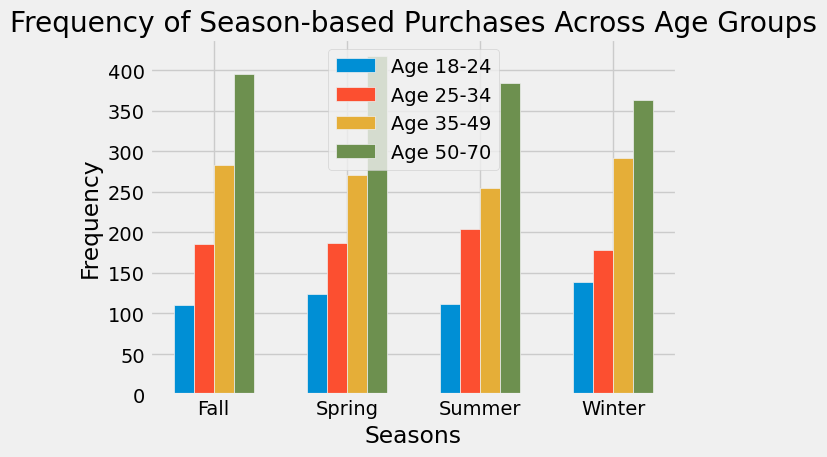

In [3]:
seasonfreq_18_to_24 = ages_18_to_24.group('Season')
seasonfreq_25_to_34 = ages_25_to_34.group('Season')
seasonfreq_35_to_49 = ages_35_to_49.group('Season')
seasonfreq_50_to_70 = ages_50_to_70.group('Season')
seasonfreqs = (seasonfreq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Season', seasonfreq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Season', seasonfreq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Season', seasonfreq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
seasonfreqs

seasons = make_array("Fall", "Spring", "Summer", "Winter")
index = np.arange(len(seasons))
bar_width = 0.15

plots.bar(index,seasonfreqs.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, seasonfreqs.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2*bar_width, seasonfreqs.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3*bar_width, seasonfreqs.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Seasons')
plots.ylabel('Frequency')
plots.title("Frequency of Season-based Purchases Across Age Groups")
plots.xticks(index + 1.5 * bar_width, seasons)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Shipping vs Frequency of Purchases of Different Age Groups

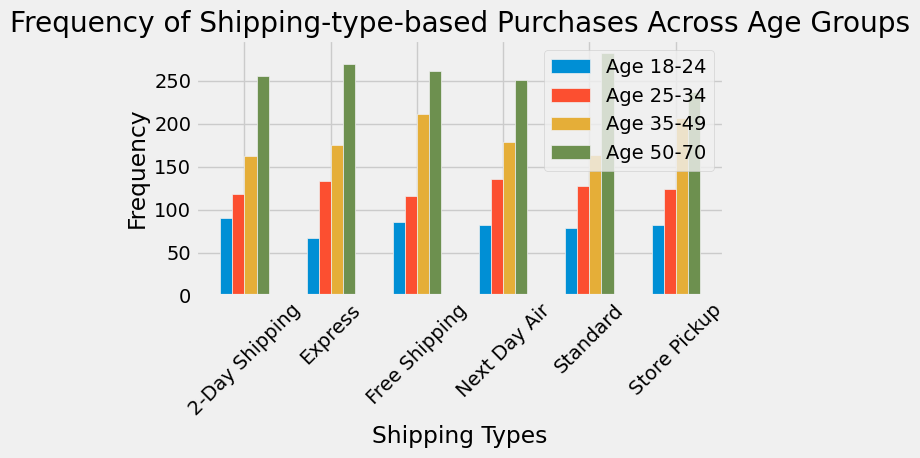

In [4]:
shippingfreq_18_to_24 = ages_18_to_24.group('Shipping Type')
shippingfreq_25_to_34 = ages_25_to_34.group('Shipping Type')
shippingfreq_35_to_49 = ages_35_to_49.group('Shipping Type')
shippingfreq_50_to_70 = ages_50_to_70.group('Shipping Type')
shippingfreqs = (shippingfreq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Shipping Type', shippingfreq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Shipping Type', shippingfreq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Shipping Type', shippingfreq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
shippingfreqs

shipping_types = shippingfreqs.column('Shipping Type')
index = np.arange(len(shipping_types))
bar_width = 0.14 

plots.bar(index,shippingfreqs.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, shippingfreqs.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2*bar_width, shippingfreqs.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3*bar_width, shippingfreqs.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xticks(rotation=45)
plots.xlabel('Shipping Types')
plots.ylabel('Frequency')
plots.title("Frequency of Shipping-type-based Purchases Across Age Groups")
plots.xticks(index + 1.5 * bar_width, shipping_types)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Cateogry vs Frequency of Purchases of Different Age Groups

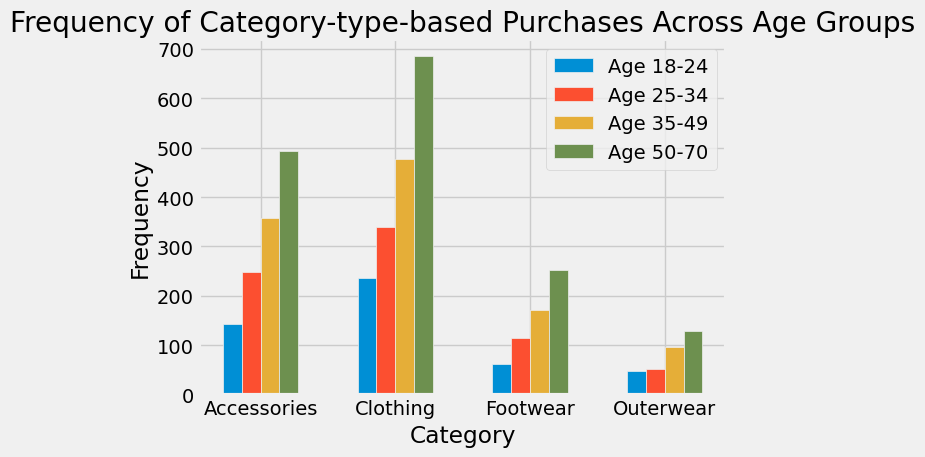

In [45]:
categoryfreq_18_to_24 = ages_18_to_24.group('Category')
categoryfreq_25_to_34 = ages_25_to_34.group('Category')
categoryfreq_35_to_49 = ages_35_to_49.group('Category')
categoryfreq_50_to_70 = ages_50_to_70.group('Category')
categoryfreqs = (categoryfreq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Category', categoryfreq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Category', categoryfreq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Category', categoryfreq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
categoryfreqs

category = categoryfreqs.column('Category')
index = np.arange(len(category))
bar_width = 0.14 

plots.bar(index,categoryfreqs.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, categoryfreqs.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2*bar_width, categoryfreqs.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3*bar_width, categoryfreqs.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Category')
plots.ylabel('Frequency')
plots.title("Frequency of Category-type-based Purchases Across Age Groups")
plots.xticks(index + 1.5 * bar_width, category)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Discounts Applied vs Frequency of Purchases of Different Age Groups

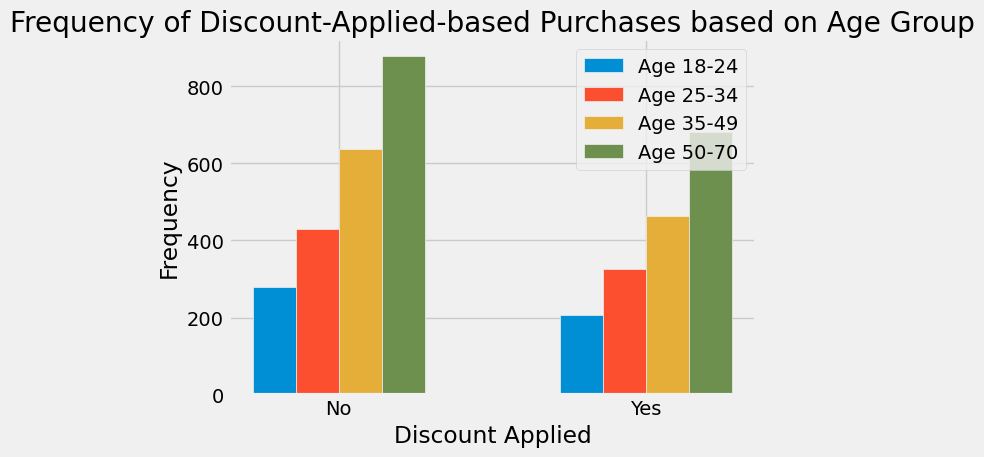

In [46]:
discountfreq_18_to_24 = ages_18_to_24.group('Discount Applied')
discountfreq_25_to_34 = ages_25_to_34.group('Discount Applied')
discountfreq_35_to_49 = ages_35_to_49.group('Discount Applied')
discountfreq_50_to_70 = ages_50_to_70.group('Discount Applied')
discountfreqs = (discountfreq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Discount Applied', discountfreq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Discount Applied', discountfreq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Discount Applied', discountfreq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
discountfreqs

discount = discountfreqs.column('Discount Applied')
index = np.arange(len(discount))
bar_width = 0.14 

plots.bar(index, discountfreqs.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, discountfreqs.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2 * bar_width, discountfreqs.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3 * bar_width, discountfreqs.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Discount Applied')
plots.ylabel('Frequency')
plots.title("Frequency of Discount-Applied-based Purchases based on Age Group")
plots.xticks(index + 1.5 * bar_width, discount)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Promo-codes Applied vs Frequency of Purchases of Different Age Groups

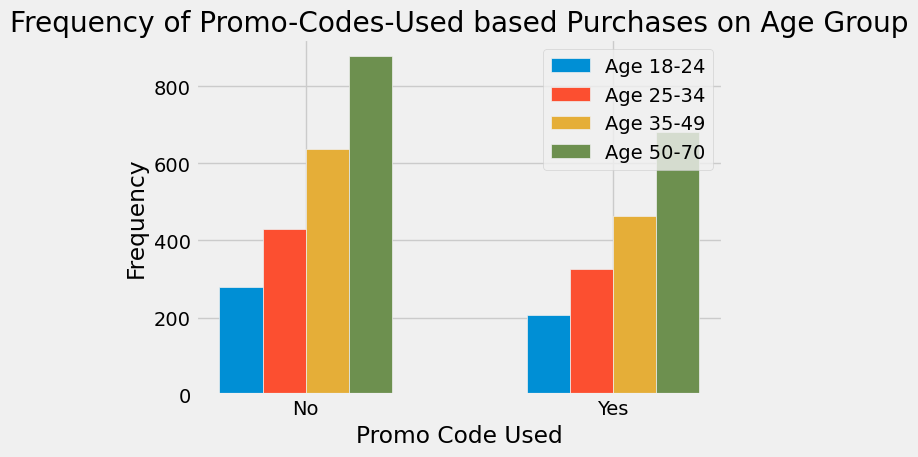

In [47]:
promofreq_18_to_24 = ages_18_to_24.group('Promo Code Used')
promofreq_25_to_34 = ages_25_to_34.group('Promo Code Used')
promofreq_35_to_49 = ages_35_to_49.group('Promo Code Used')
promofreq_50_to_70 = ages_50_to_70.group('Promo Code Used')
promofreqs = (promofreq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Promo Code Used', promofreq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Promo Code Used', promofreq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Promo Code Used', promofreq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
promofreqs

promo_code = promofreqs.column('Promo Code Used')
index = np.arange(len(promo_code))
bar_width = 0.14 

plots.bar(index, promofreqs.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, promofreqs.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2 * bar_width, promofreqs.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3 * bar_width, promofreqs.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Promo Code Used')
plots.ylabel('Frequency')
plots.title("Frequency of Promo-Codes-Used based Purchases on Age Group")
plots.xticks(index + 1.5 * bar_width, promo_code)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Location vs Frequency of Purchases of Different Age Groups

In [8]:
east_coast = make_array('Connecticut','Delaware','Maine','Maryland','Massachusetts','New Hampshire','New Jersey','New York','Pennsylvania','Rhode Island','Vermont','Washington D.C.','Alabama','Florida','Georgia','South Carolina','North Carolina','Virginia','West Virginia')
west_coast = make_array('Alaska','California','Hawaii','Oregon','Washington')
mid_west = make_array('Illinois','Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin','Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Oklahoma','Texas','Utah','Wyoming')

In [9]:
# east coast frequencies 
eastfreqs18_to_24 = sum(ages_18_to_24.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
eastfreqs25_to_34 = sum(ages_25_to_34.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
eastfreqs35_to_49 = sum(ages_35_to_49.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
eastfreqs50_to_70 = sum(ages_50_to_70.where('Location', are.equal_to(east_coast)).group('Location').column('count'))

/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are 

In [10]:
# west coast frequencies 
westfreqs18_to_24 = sum(ages_18_to_24.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
westfreqs25_to_34 = sum(ages_25_to_34.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
westfreqs35_to_49 = sum(ages_35_to_49.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
westfreqs50_to_70 = sum(ages_50_to_70.where('Location', are.equal_to(west_coast)).group('Location').column('count'))

/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are 

In [11]:
# midwest frequencies
midwestfreqs18_to_24 = sum(ages_18_to_24.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
midwestfreqs25_to_34 = sum(ages_25_to_34.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
midwestfreqs35_to_49 = sum(ages_35_to_49.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
midwestfreqs50_to_70 = sum(ages_50_to_70.where('Location', are.equal_to(mid_west)).group('Location').column('count'))

/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are 

In [12]:
regions = make_array('East Coast', 'West Coast', 'Midwest')
regions18_to_24 = make_array(eastfreqs18_to_24, westfreqs18_to_24, midwestfreqs18_to_24)
regions25_to_34 = make_array(eastfreqs25_to_34, westfreqs25_to_34, midwestfreqs25_to_34)
regions35_to_49 = make_array(eastfreqs35_to_49, westfreqs35_to_49, midwestfreqs35_to_49)
regions50_to_70 = make_array(eastfreqs50_to_70, westfreqs50_to_70, midwestfreqs50_to_70)
region_frequency = Table().with_columns('Regions', regions, 'Age 18-24', regions18_to_24, 'Age 25-34', regions25_to_34, 'Age 35-49', regions35_to_49, 'Age 50-70', regions50_to_70)

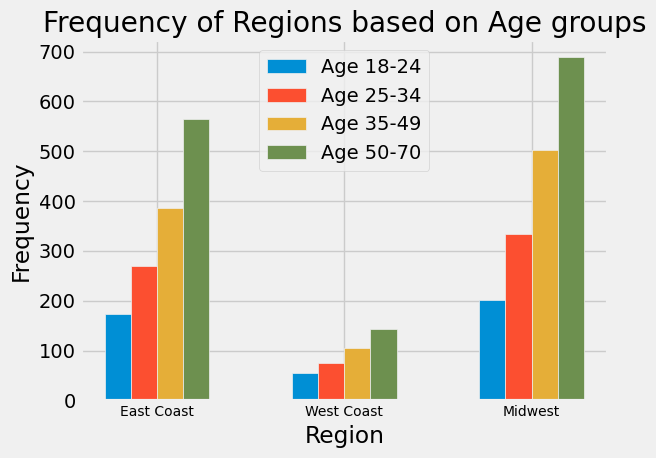

In [13]:
i = make_array(0,1,2)
plots.bar(i,region_frequency.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(i + bar_width, region_frequency.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(i + 2*bar_width, region_frequency.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(i + 3*bar_width, region_frequency.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Region')
plots.ylabel('Frequency')
plots.title("Frequency of Regions based on Age groups")
plots.xticks(i + 1.5 * bar_width,regions, fontsize=10)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Payment method vs Frequency of Purchases of Different Age Groups

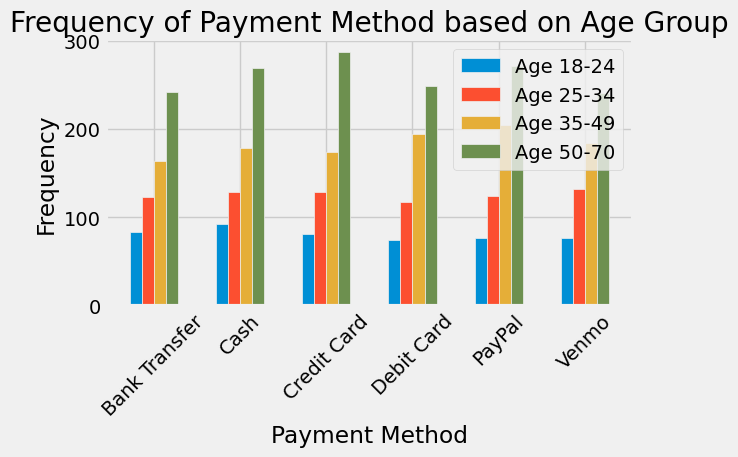

In [14]:
payment_method_freq_18_to_24 = ages_18_to_24.group('Payment Method')
payment_method_freq_25_to_34 = ages_25_to_34.group('Payment Method')
payment_method_freq_35_to_49 = ages_35_to_49.group('Payment Method')
payment_method_freq_50_to_70 = ages_50_to_70.group('Payment Method')
payment_method_freqs = (payment_method_freq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Payment Method', payment_method_freq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Payment Method', payment_method_freq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Payment Method', payment_method_freq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
payment_method_freqs

payment_method = payment_method_freqs.column('Payment Method')
index = np.arange(len(payment_method))
bar_width = 0.14 

plots.bar(index, payment_method_freqs.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, payment_method_freqs.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2 * bar_width, payment_method_freqs.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3 * bar_width, payment_method_freqs.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xticks(rotation=45)
plots.xlabel('Payment Method')
plots.ylabel('Frequency')
plots.title("Frequency of Payment Method based on Age Group")
plots.xticks(index + 1.5 * bar_width, payment_method)
plots.legend()
plots.tight_layout()
plots.show()

From looking at all the histograms produced when comparing how consumer purchasing variables influence frequency in purchase across different age groups, it demonstrate a consistent relationship suggesting that as age increases, purchase frequency tends to rise as well. These findings suggest a potential correlation wherein older age groups exhibit greater engagement in purchases, potentially influenced by factors like established shopping habit or specific life-stage needs.

<h3> What is the biggest influence in frequency of purchases according to each age group?

To dive in deeper into what is the catalyst behind these frequencies, we created a table which analyzes the how various consumer purchasing variables influence frequency in purchases across different age groups. By obtaining this information, this can help brands understand their points of faults and positves than can help them improve the frequency of purchases from people in different age groups. 

<h4> Season 

In [15]:
seasonfreq_18_to_24 = ages_18_to_24.group('Season')
seasonfreq_25_to_34 = ages_25_to_34.group('Season')
seasonfreq_35_to_49 = ages_35_to_49.group('Season')
seasonfreq_50_to_70 = ages_50_to_70.group('Season')
seasonfreqs = (seasonfreq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Season', seasonfreq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Season', seasonfreq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Season', seasonfreq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
seasonfreqs


Season,Age 18-24,Age 25-34,Age 35-49,Age 50-70
Fall,111,186,283,395
Spring,124,187,271,417
Summer,112,204,255,384
Winter,139,178,291,363


In [16]:
counts_18_24 = seasonfreqs['Age 18-24']
counts_25_34 = seasonfreqs['Age 25-34']
counts_35_49 = seasonfreqs['Age 35-49']
counts_50_70 = seasonfreqs['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 139
Maximum count in Age 25-34 group: 204
Maximum count in Age 35-49 group: 291
Maximum count in Age 50-70 group: 417


<h4> Shipping type

In [17]:
shipping_type_freq_18_to_24 = ages_18_to_24.group('Shipping Type')
shipping_type_freq_25_to_34 = ages_25_to_34.group('Shipping Type')
shipping_type_freq_35_to_49 = ages_35_to_49.group('Shipping Type')
shipping_type_freq_50_to_70 = ages_50_to_70.group('Shipping Type')

shipping_type_freqs = (shipping_type_freq_18_to_24
 .relabeled('count', 'Age 18-24')
 .join('Shipping Type', shipping_type_freq_25_to_34)
 .relabeled('count', 'Age 25-34')
 .join('Shipping Type', shipping_type_freq_35_to_49)
 .relabeled('count', 'Age 35-49')
 .join('Shipping Type', shipping_type_freq_50_to_70)
 .relabeled('count', 'Age 50-70')
)
shipping_type_freqs

Shipping Type,Age 18-24,Age 25-34,Age 35-49,Age 50-70
2-Day Shipping,90,118,163,256
Express,67,133,176,270
Free Shipping,86,116,211,262
Next Day Air,82,136,179,251
Standard,79,128,164,283
Store Pickup,82,124,207,237


In [18]:
counts_18_24 = shipping_type_freqs['Age 18-24']
counts_25_34 = shipping_type_freqs['Age 25-34']
counts_35_49 = shipping_type_freqs['Age 35-49']
counts_50_70 = shipping_type_freqs['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 90
Maximum count in Age 25-34 group: 136
Maximum count in Age 35-49 group: 211
Maximum count in Age 50-70 group: 283


<h4> Category

In [19]:
category_freq_18_to_24 = ages_18_to_24.group('Category')
category_freq_25_to_34 = ages_25_to_34.group('Category')
category_freq_35_to_49 = ages_35_to_49.group('Category')
category_freq_50_to_70 = ages_50_to_70.group('Category')

category_freqs = (category_freq_18_to_24
    .relabeled('count', 'Age 18-24')
    .join('Category', category_freq_25_to_34)
    .relabeled('count', 'Age 25-34')
    .join('Category', category_freq_35_to_49)
    .relabeled('count', 'Age 35-49')
    .join('Category', category_freq_50_to_70)
    .relabeled('count', 'Age 50-70')
)
category_freqs

Category,Age 18-24,Age 25-34,Age 35-49,Age 50-70
Accessories,142,248,357,493
Clothing,236,340,476,685
Footwear,61,115,171,252
Outerwear,47,52,96,129


In [20]:
counts_18_24 = category_freqs['Age 18-24']
counts_25_34 = category_freqs['Age 25-34']
counts_35_49 = category_freqs['Age 35-49']
counts_50_70 = category_freqs['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 236
Maximum count in Age 25-34 group: 340
Maximum count in Age 35-49 group: 476
Maximum count in Age 50-70 group: 685


<h4> Discount Applied

In [21]:
discount_applied_freq_18_to_24 = ages_18_to_24.group('Discount Applied')
discount_applied_freq_25_to_34 = ages_25_to_34.group('Discount Applied')
discount_applied_freq_35_to_49 = ages_35_to_49.group('Discount Applied')
discount_applied_freq_50_to_70 = ages_50_to_70.group('Discount Applied')

discount_applied_freqs = (discount_applied_freq_18_to_24
    .relabeled('count', 'Age 18-24')
    .join('Discount Applied', discount_applied_freq_25_to_34)
    .relabeled('count', 'Age 25-34')
    .join('Discount Applied', discount_applied_freq_35_to_49)
    .relabeled('count', 'Age 35-49')
    .join('Discount Applied', discount_applied_freq_50_to_70)
    .relabeled('count', 'Age 50-70')
)
discount_applied_freqs

Discount Applied,Age 18-24,Age 25-34,Age 35-49,Age 50-70
No,279,429,637,878
Yes,207,326,463,681


In [22]:
counts_18_24 = discount_applied_freqs['Age 18-24']
counts_25_34 = discount_applied_freqs['Age 25-34']
counts_35_49 = discount_applied_freqs['Age 35-49']
counts_50_70 = discount_applied_freqs['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 279
Maximum count in Age 25-34 group: 429
Maximum count in Age 35-49 group: 637
Maximum count in Age 50-70 group: 878


<h4> Promo code Used

In [23]:
promo_code_used_freq_18_to_24 = ages_18_to_24.group('Promo Code Used')
promo_code_used_freq_25_to_34 = ages_25_to_34.group('Promo Code Used')
promo_code_used_freq_35_to_49 = ages_35_to_49.group('Promo Code Used')
promo_code_used_freq_50_to_70 = ages_50_to_70.group('Promo Code Used')

promo_code_used_freqs = (promo_code_used_freq_18_to_24
    .relabeled('count', 'Age 18-24')
    .join('Promo Code Used', promo_code_used_freq_25_to_34)
    .relabeled('count', 'Age 25-34')
    .join('Promo Code Used', promo_code_used_freq_35_to_49)
    .relabeled('count', 'Age 35-49')
    .join('Promo Code Used', promo_code_used_freq_50_to_70)
    .relabeled('count', 'Age 50-70')
)
promo_code_used_freqs

Promo Code Used,Age 18-24,Age 25-34,Age 35-49,Age 50-70
No,279,429,637,878
Yes,207,326,463,681


In [24]:
counts_18_24 = promo_code_used_freqs['Age 18-24']
counts_25_34 = promo_code_used_freqs['Age 25-34']
counts_35_49 = promo_code_used_freqs['Age 35-49']
counts_50_70 = promo_code_used_freqs['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 279
Maximum count in Age 25-34 group: 429
Maximum count in Age 35-49 group: 637
Maximum count in Age 50-70 group: 878


<h4> Location

In [25]:
region_frequency

Regions,Age 18-24,Age 25-34,Age 35-49,Age 50-70
East Coast,174,269,386,565
West Coast,55,76,105,143
Midwest,202,335,503,688


In [26]:
counts_18_24 = region_frequency['Age 18-24']
counts_25_34 = region_frequency['Age 25-34']
counts_35_49 = region_frequency['Age 35-49']
counts_50_70 = region_frequency['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 202
Maximum count in Age 25-34 group: 335
Maximum count in Age 35-49 group: 503
Maximum count in Age 50-70 group: 688


<h4> Payment Method

In [27]:
payment_method_freq_18_to_24 = ages_18_to_24.group('Payment Method')
payment_method_freq_25_to_34 = ages_25_to_34.group('Payment Method')
payment_method_freq_35_to_49 = ages_35_to_49.group('Payment Method')
payment_method_freq_50_to_70 = ages_50_to_70.group('Payment Method')

payment_method_freqs = (payment_method_freq_18_to_24
    .relabeled('count', 'Age 18-24')
    .join('Payment Method', payment_method_freq_25_to_34)
    .relabeled('count', 'Age 25-34')
    .join('Payment Method', payment_method_freq_35_to_49)
    .relabeled('count', 'Age 35-49')
    .join('Payment Method', payment_method_freq_50_to_70)
    .relabeled('count', 'Age 50-70')
)
payment_method_freqs

Payment Method,Age 18-24,Age 25-34,Age 35-49,Age 50-70
Bank Transfer,83,123,164,242
Cash,93,129,179,269
Credit Card,81,129,174,287
Debit Card,75,118,194,249
PayPal,77,124,205,271
Venmo,77,132,184,241


In [28]:
counts_18_24 = payment_method_freqs['Age 18-24']
counts_25_34 = payment_method_freqs['Age 25-34']
counts_35_49 = payment_method_freqs['Age 35-49']
counts_50_70 = payment_method_freqs['Age 50-70']

max_count_18_24 = max(counts_18_24)
max_count_25_34 = max(counts_25_34)
max_count_35_49 = max(counts_35_49)
max_count_50_70 = max(counts_50_70)

print(f"Maximum count in Age 18-24 group: {max_count_18_24}")
print(f"Maximum count in Age 25-34 group: {max_count_25_34}")
print(f"Maximum count in Age 35-49 group: {max_count_35_49}")
print(f"Maximum count in Age 50-70 group: {max_count_50_70}")

Maximum count in Age 18-24 group: 93
Maximum count in Age 25-34 group: 132
Maximum count in Age 35-49 group: 205
Maximum count in Age 50-70 group: 287


<h3> Summary Part 1

**Most frequent purchases**
* Ages 18-24 promo code and discount applied not used leads to the most frequent purchase: 279
* Ages 25-34 promo code and discount applied not used leads to the most frequent purchase: 429 
* Ages 35-49 promo code and discount applied not used leads to the most frequent purchase: 637
* Ages 50-70 promo code and discount applied not used leads to the most frequent purchase: 878


**Least most frequent purchases**
* Ages 18-24 shipping type leads to the least most frequent purchases: 90 
* Ages 25-34 payment method leads to the least most frequent purchases: 132
* Ages 35_49 payment method leads to the least most frequent purchases: 205
* Ages 50-70 shipping type leads to the least most frequent purchases: 283


Through our tables, we found that not offering promotional codes and discounts leads to the highest purchase frequency across all age groups. This indicates that people are not that incentivized with promotional/discount codes and that having them does not neccessarily translate to more significant frequent purchases.

On the other hand, to help brands understand what they could do to improve and increase the frequency of purchases of people across different age groups, we also found which consumer purchasing variable leads to the least most frequent purchases. In the age brackets of 18-24 and 50-70, the choice of shipping method notably affects purchase frequency. Thus, to increase transaction frequency within these age groups, brands targeting them might explore optimization strategies and incentives related to the shipping process. Specifically, these are their preferences: 

* Ages 18 - 24 shipping method that leads to highest purchase frequency is **2 Day Shipping & Free Shipping** 
* Ages 50 - 70 shipping method that leads to highest purchase frequency is **Express & Standard** 


Hence, if brands wants to improve the frequency of purchases within the 18 - 24 age group, they should create pormotional campaigns that allows customers to get free shipping or 2 day shipping. Whereas, for brands tagretting ages 50 - 70, they do not need to prioritize free shipping because it does not play as a signficant role to the people within the 50 - 70 age group. 

Additionally, among the age ranges of 25-34 and 35-49, a connection exists between payment methods and reduced purchase frequency. To stimulate more frequent transactions in these demographics, brands could enhance the payment experience, potentially by offering diverse payment options aligning with the preferences of individuals in these age brackets. 

* Ages 25 - 34 payment method that leads to highest purchase frequency is **Venmo** 
* Ages 35 - 49 payment method that leads to higher purchase frequency is **Pay Pal**

If brands want to target more 25 - 34 year olds, they should implement Venmo in their system. On the other hand, for customers ages 35 - 49 , they should do Paypal. By implementing these options, it will increase the ease and frequency of people within these age groups to purchase their products. 


<h3> Random Sampling 

To validate the summary above, we  are going to take a random sample of our original data to reduce biases and variances. We did this by taking a sample of 100 customers from each age group to ensure that our former findings is consistent throughout all instances in our data.

<h4> Sampled Category

In [29]:
categorysampled1 = ages_18_to_24.sample(100, with_replacement=False).group('Category')
categorysampled2 = ages_25_to_34.sample(100, with_replacement=False).group('Category')
categorysampled3 = ages_35_to_49.sample(100, with_replacement=False).group('Category')
categorysampled4 = ages_50_to_70.sample(100, with_replacement=False).group('Category')

In [30]:
sampled_categories = (categorysampled1
 .relabeled('count', 'Age 18-24')
 .join('Category', categorysampled2)
 .relabeled('count', 'Age 25-34')
 .join('Category', categorysampled3)
 .relabeled('count', 'Age 35-49')
 .join('Category', categorysampled4)
 .relabeled('count', 'Age 50-70')
)
sampled_categories

Category,Age 18-24,Age 25-34,Age 35-49,Age 50-70
Accessories,31,32,28,26
Clothing,44,49,53,44
Footwear,17,15,13,23
Outerwear,8,4,6,7


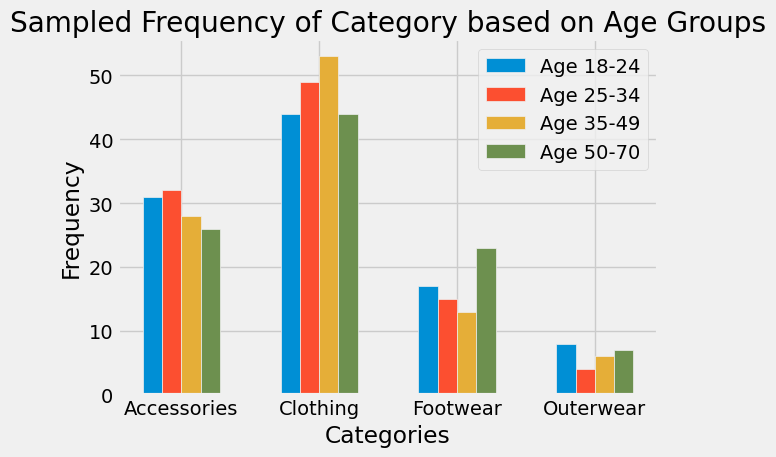

In [31]:
#bar graph to represent these values 
Categories = sampled_categories.column('Category')
array_3 = np.arange(0,4,1)

plots.bar(array_3,sampled_categories.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(array_3 + bar_width, sampled_categories.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(array_3 + 2*bar_width, sampled_categories.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(array_3 + 3*bar_width, sampled_categories.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Categories')
plots.ylabel('Frequency')
plots.title("Sampled Frequency of Category based on Age Groups")
plots.xticks(array_3 + 1.5 * bar_width, Categories)
plots.legend()
plots.tight_layout()
#category_avgs.barh('Category')
plots.show()

<h4> Sampled Promo Code Used

In [32]:
sampledpromocode1 = ages_18_to_24.sample(100, with_replacement=False).group('Promo Code Used')
sampledpromocode2 = ages_25_to_34.sample(100, with_replacement=False).group('Promo Code Used')
sampledpromocode3 = ages_35_to_49.sample(100, with_replacement=False).group('Promo Code Used')
sampledpromocode4 = ages_50_to_70.sample(100, with_replacement=False).group('Promo Code Used')

In [33]:
sampled_promocodeused = (sampledpromocode1
 .relabeled('count', 'Age 18-24')
 .join('Promo Code Used', sampledpromocode2)
 .relabeled('count', 'Age 25-34')
 .join('Promo Code Used', sampledpromocode3)
 .relabeled('count', 'Age 35-49')
 .join('Promo Code Used', sampledpromocode4)
 .relabeled('count', 'Age 50-70')
)
sampled_promocodeused

Promo Code Used,Age 18-24,Age 25-34,Age 35-49,Age 50-70
No,59,51,61,57
Yes,41,49,39,43


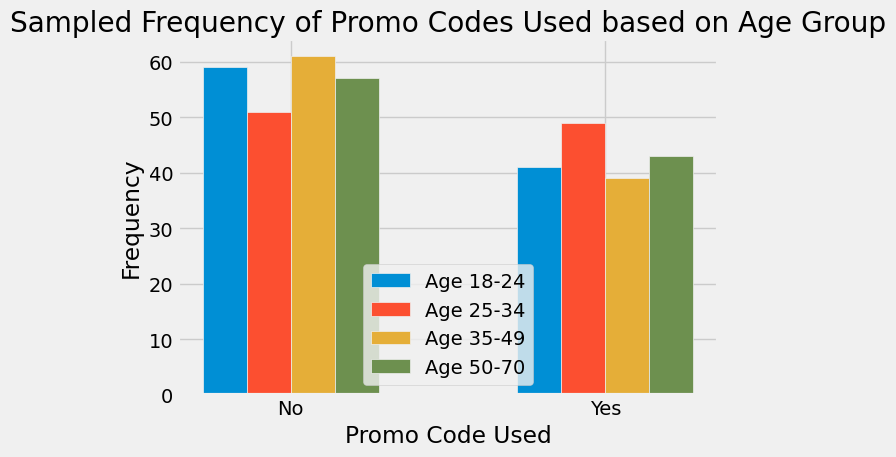

In [34]:
promo_code = promofreqs.column('Promo Code Used')
index = np.arange(len(promo_code))
bar_width = 0.14 

plots.bar(index, sampled_promocodeused.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index + bar_width, sampled_promocodeused.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index + 2 * bar_width, sampled_promocodeused.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index + 3 * bar_width, sampled_promocodeused.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Promo Code Used')
plots.ylabel('Frequency')
plots.title("Sampled Frequency of Promo Codes Used based on Age Group")
plots.xticks(index + 1.5 * bar_width, promo_code)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Sampled Shipping Type

In [35]:
shippingsampled1 = ages_18_to_24.sample(100, with_replacement=False).group('Shipping Type')
shippingsampled2 = ages_25_to_34.sample(100, with_replacement=False).group('Shipping Type')
shippingsampled3 = ages_35_to_49.sample(100, with_replacement=False).group('Shipping Type')
shippingsampled4 = ages_50_to_70.sample(100, with_replacement=False).group('Shipping Type')

In [36]:
sampled_shippingtype = (shippingsampled1
 .relabeled('count', 'Age 18-24')
 .join('Shipping Type', shippingsampled2)
 .relabeled('count', 'Age 25-34')
 .join('Shipping Type', shippingsampled3)
 .relabeled('count', 'Age 35-49')
 .join('Shipping Type', shippingsampled4)
 .relabeled('count', 'Age 50-70')
)
sampled_shippingtype

Shipping Type,Age 18-24,Age 25-34,Age 35-49,Age 50-70
2-Day Shipping,19,10,14,9
Express,14,15,15,21
Free Shipping,17,14,20,16
Next Day Air,12,23,19,16
Standard,19,19,15,21
Store Pickup,19,19,17,17


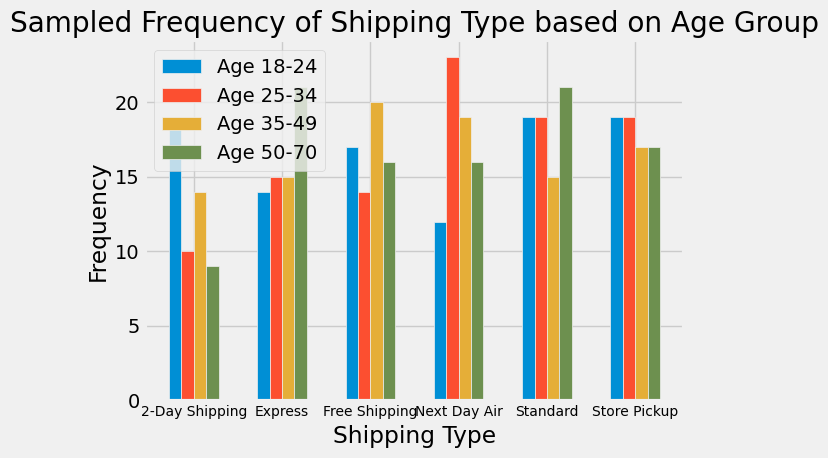

In [37]:
shipping_type = sampled_shippingtype.column('Shipping Type')
index2 = np.arange(len(shipping_type))
bar_width = 0.14 

plots.bar(index2, sampled_shippingtype.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index2 + bar_width, sampled_shippingtype.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index2 + 2 * bar_width, sampled_shippingtype.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index2 + 3 * bar_width, sampled_shippingtype.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Shipping Type')
plots.ylabel('Frequency')
plots.title("Sampled Frequency of Shipping Type based on Age Group")
plots.xticks(index2 + 1.5 * bar_width, shipping_type, fontsize = 10)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Sampled Seasons

In [38]:
seasonsampled1 = ages_18_to_24.sample(100, with_replacement=False).group('Season')
seasonsampled2 = ages_25_to_34.sample(100, with_replacement=False).group('Season')
seasonsampled3 = ages_35_to_49.sample(100, with_replacement=False).group('Season')
seasonsampled4 = ages_50_to_70.sample(100, with_replacement=False).group('Season')

In [39]:
sampled_season = (seasonsampled1
 .relabeled('count', 'Age 18-24')
 .join('Season', seasonsampled2)
 .relabeled('count', 'Age 25-34')
 .join('Season', seasonsampled3)
 .relabeled('count', 'Age 35-49')
 .join('Season', seasonsampled4)
 .relabeled('count', 'Age 50-70')
)
sampled_season

Season,Age 18-24,Age 25-34,Age 35-49,Age 50-70
Fall,26,30,23,25
Spring,24,25,23,28
Summer,29,26,20,24
Winter,21,19,34,23


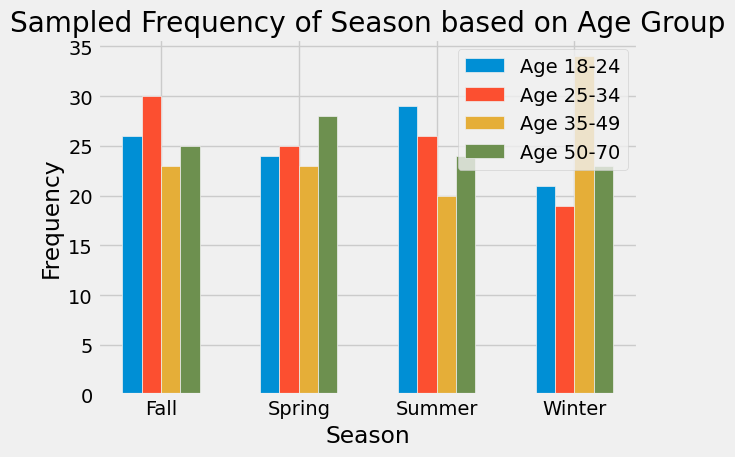

In [40]:
season = sampled_season.column('Season')
index2 = np.arange(len(season))
bar_width = 0.14 

plots.bar(index2, sampled_season.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index2 + bar_width, sampled_season.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index2 + 2 * bar_width, sampled_season.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index2 + 3 * bar_width, sampled_season.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Season')
plots.ylabel('Frequency')
plots.title("Sampled Frequency of Season based on Age Group")
plots.xticks(index2 + 1.5 * bar_width, season)
plots.legend()
plots.tight_layout()
plots.show()

<h4> Sampled Regions

In [41]:
sampledage1 = ages_18_to_24.sample(100, with_replacement=False).group('Location')
sampledage2 = ages_25_to_34.sample(100, with_replacement=False).group('Location')
sampledage3 = ages_35_to_49.sample(100, with_replacement=False).group('Location')
sampledage4 = ages_50_to_70.sample(100, with_replacement=False).group('Location')
# east coast frequencies 
sampledeastfreqs1 = sum(sampledage1.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
sampledeastfreqs2 = sum(sampledage2.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
sampledeastfreqs3 = sum(sampledage3.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
sampledeastfreqs4 = sum(sampledage4.where('Location', are.equal_to(east_coast)).group('Location').column('count'))
# west coast frequencies 
sampledwestfreqs1 = sum(sampledage1.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
sampledwestfreqs2 = sum(sampledage2.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
sampledwestfreqs3 = sum(sampledage3.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
sampledwestfreqs4 = sum(sampledage4.where('Location', are.equal_to(west_coast)).group('Location').column('count'))
# midcoast frequencies 
sampledmidwestfreqs1 = sum(sampledage1.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
sampledmidwestfreqs2 = sum(sampledage2.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
sampledmidwestfreqs3 = sum(sampledage3.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
sampledmidwestfreqs4 = sum(sampledage4.where('Location', are.equal_to(mid_west)).group('Location').column('count'))
# sampled table
sampledregions18_to_24 = make_array(sampledeastfreqs1, sampledwestfreqs1, sampledmidwestfreqs1)
sampledregions25_to_34 = make_array(sampledeastfreqs2, sampledwestfreqs2, sampledmidwestfreqs2)
sampledregions35_to_49 = make_array(sampledeastfreqs3, sampledwestfreqs3, sampledmidwestfreqs3)
sampledregions50_to_70 = make_array(sampledeastfreqs4, sampledwestfreqs4, sampledmidwestfreqs4)
sampledregion = Table().with_columns(
    'Regions', regions, 
    'Age 18-24', sampledregions18_to_24, 
    'Age 25-34', sampledregions25_to_34, 
    'Age 35-49', sampledregions35_to_49, 
    'Age 50-70', sampledregions50_to_70)
sampledregion

/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \
/opt/conda/lib/python3.10/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are 

Regions,Age 18-24,Age 25-34,Age 35-49,Age 50-70
East Coast,16,15,14,16
West Coast,5,4,4,4
Midwest,18,20,20,19


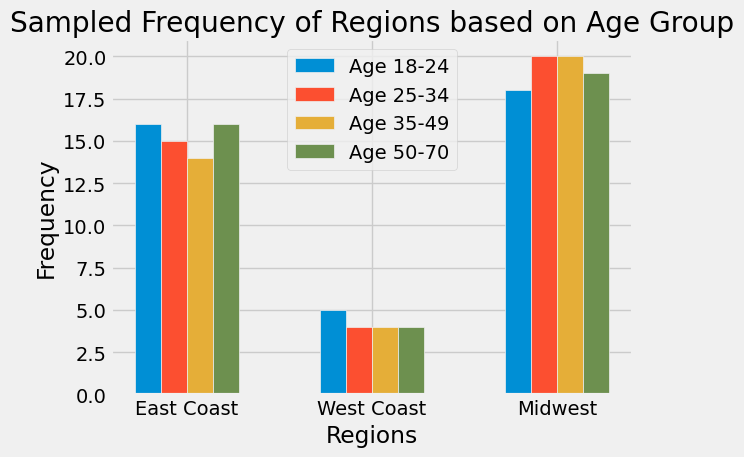

In [42]:
index3 = np.arange(len(regions))
bar_width = 0.14 

plots.bar(index3, sampledregion.column('Age 18-24'), bar_width, label='Age 18-24')
plots.bar(index3 + bar_width, sampledregion.column('Age 25-34'), bar_width, label='Age 25-34')
plots.bar(index3 + 2 * bar_width, sampledregion.column('Age 35-49'), bar_width, label='Age 35-49')
plots.bar(index3 + 3 * bar_width, sampledregion.column('Age 50-70'), bar_width, label='Age 50-70')
plots.xlabel('Regions')
plots.ylabel('Frequency')
plots.title("Sampled Frequency of Regions based on Age Group")
plots.xticks(index3 + 1.5 * bar_width, regions)
plots.legend()
plots.tight_layout()
plots.show()

<h3> Summary Part 2

In examining the sampled data, we’ve found that there are some inconsistencies when resampling. 

**Categories, Promo Code Use, and Discount Applied Across Age Groups:**

Upon analyzing the resampled data, we observed that the factors such as Categories, Promo Code, and Discount Applied remained consistent with the findings derived from our initial dataset. The sampled data consistently underscores Clothing as the predominant category purchased across all age groups. This indicates a strong consumer preference for clothing, suggesting an opportunity for the business to cater to this demand. Scaling up the supply of clothing could result in more frequent purchases. Furthermore, the findings from the resampled data regarding promo code usage and applied discounts align with our original data, affirming the notion that abstaining from promotional and discount codes tends to yield higher purchase frequencies compared to their usage. Thus, this means that firms do not need to fully prioritize the option for promos/discount codes because it does not output a significant difference in purchase frequency. 

**Region:**

Although the resampled data also shows region to be consistent with our original data, there are some limitations to the findings we found. In our original and resampled data, Midwest emerges as the region with the highest purchase frequency. However, we must approach this observation with caution because the Midwest contains the most number of states (22 states) compared to the East (19 states) and West (5 states) coast. Without information on state populations, the observed frequency might be skewed because the population of the Midwest might be larger than the other areas. 

**Shipping Type and Seasonal Impact:**

The inconsistencies we found from our original data is the data resulted from Shipping Type and Seasonal Impact. Moreover, this suggests that these factors might not have an influence on purchase frequency across different age groups. As we resampled our data, we see that the most frequently used shipping type changes for each age group. For instance, we initially found that Ages 18-24 most frequently used 2 Day Shipping, but the sampled data says otherwise. The same can be said for the seasons. 

Given that categories, promo code used, and discount applied are consistent with the original findings, we can conclude that our initial summary is valid. Although region in our resampled data are consistent with our original findings, given that the limitations surrounding population amounts we can not for sure conclude that there are irregularities and biases in the data set. Lastly, since shipping type and seasonal impact is inconsistent with our original findings, there may be other determinants influencing the consumer purchasing behavior on top of seasonal impact and shipping type. 

<h2> Final Conclusions

In conclusion, our analysis of the shopping trends data has given us an understanding of how consumers across various age groups like to shop. Based on our findings, we found that a consensus that all age groups have is that they all prefer clothing, and that they do not specifically need promotional and discount offers. However, in order for brands to target specific age groups, they are going to have to use specific marketing strategies on their targeted audience. They are going to have to create more specific campaigns that appeals to these audiences because finding the right strategy isn't as simple considering how the random sampling of the consumer purchasing factors -- shipping type and season -- was inconsistent with our original findings. This demonstrates that there are other factors outside of this dataset that are influencing consumers to make certain purchasing choices. Additionally, the limitations of our analysis on the regional data demonstrates that there are multiple ways of approaching with shopping trends data. Thus, it is important to recognize that consumer purchasing habits are complex and taking note of any biases will elaborate our findings to understand the consumer and allow brands to produce better purchasing results. 